# BOSTON HOUSING

# Introduction to Dataset:

I got this dataset from Kaggle.com, this dataset focuses on housing values in suburbs of Boston. 
Attribute Information:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per 10,000 Dollars

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000's

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

loading the data

In [2]:
df=pd.read_csv("D:\projects\Boston_housing\HousingData.csv")

Exploratory data analysis

In [3]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [4]:
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273     21.0   

          B  LSTAT  MEDV  
501  391.99    NaN  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9

Getting info of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Getting statistical information of columns

In [6]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

checking for null values

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Here we can see that there are some null values in columns above

Removing null values from the columns

In [8]:
df.dropna(inplace=True)

checking for correlation between columns

In [9]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.188075  0.391552 -0.051970  0.416160 -0.227170  0.341311   
ZN      -0.188075  1.000000 -0.521256 -0.033357 -0.515660  0.343210 -0.568174   
INDUS    0.391552 -0.521256  1.000000  0.049820  0.762737 -0.403068  0.642387   
CHAS    -0.051970 -0.033357  0.049820  1.000000  0.076661  0.095308  0.072644   
NOX      0.416160 -0.515660  0.762737  0.076661  1.000000 -0.316563  0.732540   
RM      -0.227170  0.343210 -0.403068  0.095308 -0.316563  1.000000 -0.248670   
AGE      0.341311 -0.568174  0.642387  0.072644  0.732540 -0.248670  1.000000   
DIS     -0.365052  0.645359 -0.696569 -0.095037 -0.768137  0.218713 -0.753547   
RAD      0.608667 -0.298773  0.591944  0.014102  0.628170 -0.236057  0.443585   
TAX      0.560841 -0.305768  0.734204 -0.026513  0.679824 -0.320561  0.504472   
PTRATIO  0.265428 -0.422164  0.395691 -0.104995  0.210216 -0.390686  0.264968   
B       -0.386254  0.169894 -0.344788  0.068913 -0.384257  0.123320 -0.281990   
LSTAT    0.461906 -0.415041  0.598156 -0.037113  0.593655 -0.636226  0.601137   
MEDV    -0.397230  0.406822 -0.510829  0.173701 -0.459054  0.723951 -0.407470   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.365052  0.608667  0.560841  0.265428 -0.386254  0.461906 -0.397230  
ZN       0.645359 -0.298773 -0.305768 -0.422164  0.169894 -0.415041  0.406822  
INDUS   -0.696569  0.591944  0.734204  0.395691 -0.344788  0.598156 -0.510829  
CHAS    -0.095037  0.014102 -0.026513 -0.104995  0.068913 -0.037113  0.173701  
NOX     -0.768137  0.628170  0.679824  0.210216 -0.384257  0.593655 -0.459054  
RM       0.218713 -0.236057 -0.320561 -0.390686  0.123320 -0.636226  0.723951  
AGE     -0.753547  0.443585  0.504472  0.264968 -0.281990  0.601137 -0.407470  
DIS      1.000000 -0.477075 -0.529603 -0.228840  0.285168 -0.505036  0.279547  
RAD     -0.477075  1.000000  0.900000  0.441949 -0.444135  0.510868 -0.416638  
TAX     -0.529603  0.900000  1.000000  0.446961 -0.435457  0.572218 -0.508864  
PTRATIO -0.228840  0.441949  0.446961  1.000000 -0.179816  0.395006 -0.543809  
B        0.285168 -0.444135 -0.435457 -0.179816  1.000000 -0.383783  0.347256  
LSTAT   -0.505036  0.510868  0.572218  0.395006 -0.383783  1.000000 -0.743450  
MEDV     0.279547 -0.416638 -0.508864 -0.543809  0.347256 -0.743450  1.000000

visualizing correlation between columns using heatmap


<Axes: >

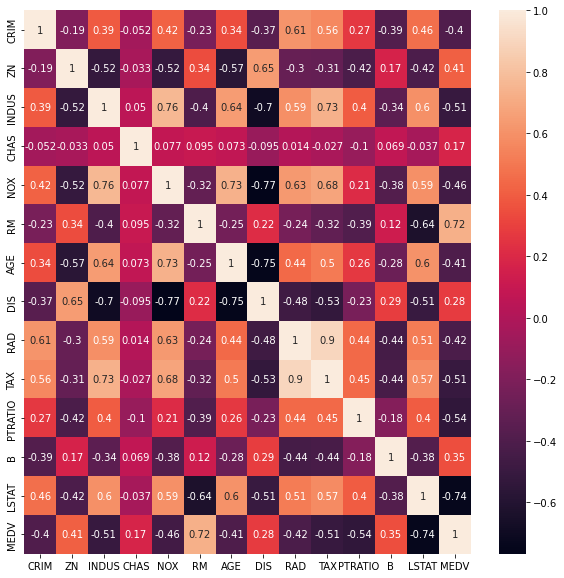

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

Histogram of each column

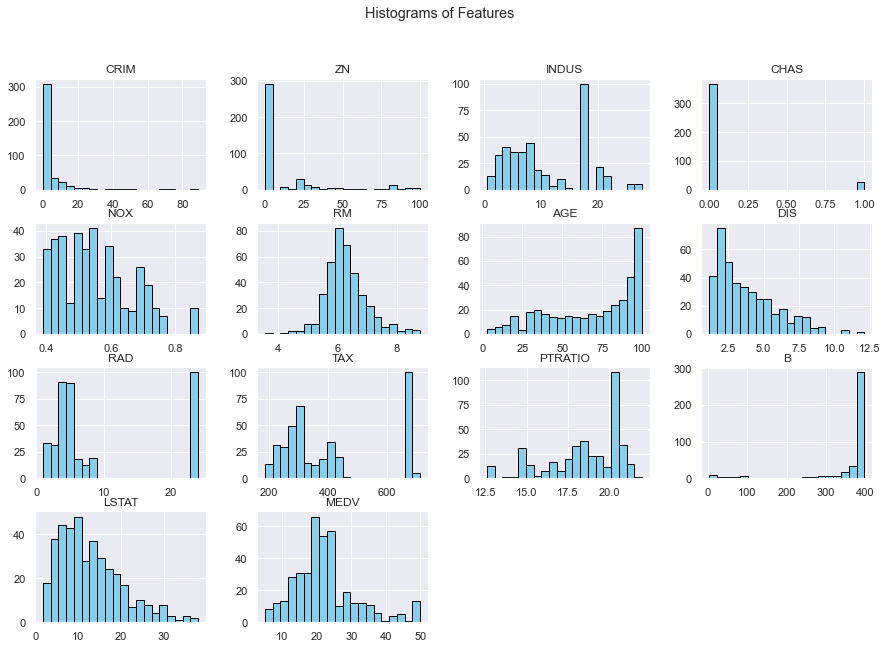

In [20]:
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features")
plt.show()

outlier detection using z score

In [21]:
z_scores = np.abs(stats.zscore(df))
outliers = np.where(z_scores > 3)
print("Outliers Detected:\n", df.iloc[outliers[0]])

Outliers Detected:
          CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
55    0.01311   90.0   1.22   0.0  0.403  7.249   21.9  8.6966    5  226   
56    0.02055   85.0   0.74   0.0  0.410  6.383   35.7  9.1876    2  313   
57    0.01432  100.0   1.32   0.0  0.411  6.816   40.5  8.3248    5  256   
102   0.22876    0.0   8.56   0.0  0.520  6.405   85.4  2.7147    5  384   
142   3.32105    0.0  19.58   1.0  0.871  5.403  100.0  1.3216    5  403   
..        ...    ...    ...   ...    ...    ...    ...     ...  ...  ...   
445  10.67180    0.0  18.10   0.0  0.740  6.459   94.8  1.9879   24  666   
454   9.51363    0.0  18.10   0.0  0.713  6.728   94.1  2.4961   24  666   
455   4.75237    0.0  18.10   0.0  0.713  6.525   86.5  2.4358   24  666   
456   4.66883    0.0  18.10   0.0  0.713  5.976   87.9  2.5806   24  666   
457   8.20058    0.0  18.10   0.0  0.713  5.936   80.3  2.7792   24  666   

     PTRATIO       B  LSTAT  MEDV  
55      17.9  395.93   4.81  35

Relationships Between Key Housing Features and Median Home Value (MEDV)

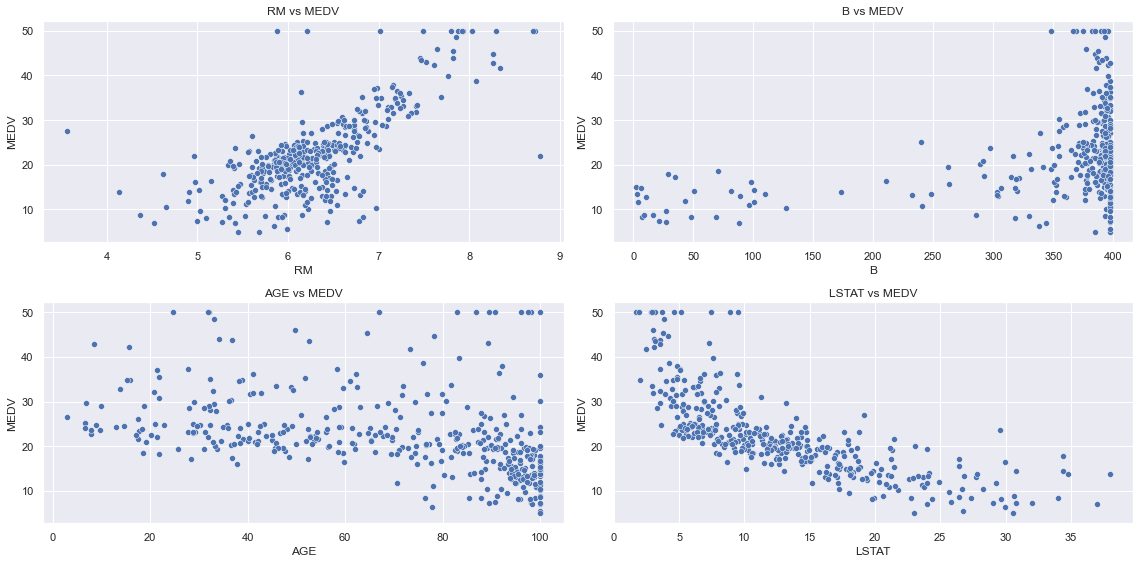

In [22]:
fig = plt.figure(figsize=(16,8))  

# 1st Subplot: RM vs MEDV
fig.add_subplot(2,2,1)
sns.scatterplot(x=df['RM'], y=df['MEDV'])
plt.title('RM vs MEDV')

# 2nd Subplot: B vs MEDV
fig.add_subplot(2,2,2)
sns.scatterplot(x=df['B'], y=df['MEDV'])
plt.title('B vs MEDV')

# 3rd Subplot: AGE vs MEDV
fig.add_subplot(2,2,3)
sns.scatterplot(x=df['AGE'], y=df['MEDV'])
plt.title('AGE vs MEDV')

# 4th Subplot: LSTAT vs MEDV
fig.add_subplot(2,2,4)
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])
plt.title('LSTAT vs MEDV')

plt.tight_layout()  
plt.show()


Comparative Analysis of Regression Models on Housing Dataset

Step 1: Function Defination and Importing the required modules/methods

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def regression_funct(x, y):
    # Split the data into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Initialize models
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    ExTree = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    KN = KNeighborsRegressor()
    XGBC = XGBRegressor()
    
    # List of models and their names
    algos = [L, R, Lass, E, ExTree, GBR, KN, XGBC]
    algo_names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'ExtraTreeRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'XGBRegressor']
    
    # Lists to store metrics
    r_squared = []
    rmse = []
    mae = []
    
    # DataFrame to store results
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)
    
    # Loop through all models
    for item in algos:
        item.fit(x_train, y_train)  # Train the model
        predictions = item.predict(x_test)  # Make predictions
        
        r_squared.append(r2_score(y_test, predictions))  # Calculate and store R^2
        rmse.append((mean_squared_error(y_test, predictions)) ** 0.5)  # Calculate and store RMSE
        mae.append(mean_absolute_error(y_test, predictions))  # Calculate and store MAE
    
    # Populate the DataFrame
    result['R_Squared'] = r_squared
    result['RMSE'] = rmse
    result['MAE'] = mae
    
    return result.sort_values('R_Squared', ascending=False)


In [24]:
x,y=df.drop("MEDV",axis=1),df[["MEDV"]] # Assign x and y


In [25]:
regression_funct(x,y) # call regression function and see results in a Dataframe


R_Squared      RMSE       MAE
GradientBoostingRegressor   0.693393  5.085393  2.851660
XGBRegressor                0.639891  5.511251  3.109865
LinearRegression            0.627085  5.608391  3.367983
ExtraTreeRegressor          0.624219  5.629904  3.608861
Ridge                       0.620702  5.656182  3.363364
ElasticNet                  0.549332  6.165407  3.949253
Lasso                       0.542840  6.209654  3.966865
KNeighborsRegressor         0.330525  7.514510  4.988861

Deep Learning

In [26]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
scaler=MinMaxScaler()

In [27]:
x,y=df.drop("MEDV",axis=1),df[["MEDV"]] # Assign x and y
x=scaler.fit_transform(x) # scale x values

In [28]:
# split data in test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [29]:
# Build the Model
model=Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [30]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=500, verbose=1)

Epoch 1/500
3/3 [==============================] - 3s 136ms/step - loss: 561.6567 - val_loss: 622.2754
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 516.9328 - val_loss: 486.9832
Epoch 3/500
3/3 [==============================] - 0s 20ms/step - loss: 341.8297 - val_loss: 130.8274
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 172.1683 - val_loss: 96.1903
Epoch 5/500
3/3 [==============================] - 0s 20ms/step - loss: 112.2548 - val_loss: 131.0048
Epoch 6/500
3/3 [==============================] - 0s 19ms/step - loss: 111.6657 - val_loss: 103.9502
Epoch 7/500
3/3 [==============================] - 0s 24ms/step - loss: 68.6069 - val_loss: 69.7174
Epoch 8/500
3/3 [==============================] - 0s 22ms/step - loss: 74.9996 - val_loss: 59.7779
Epoch 9/500
3/3 [==============================] - 0s 21ms/step - loss: 45.0899 - val_loss: 80.3221
Epoch 10/500
3/3 [==============================] - 0s 17ms/step - loss: 54.0912 - val_l

<Axes: >

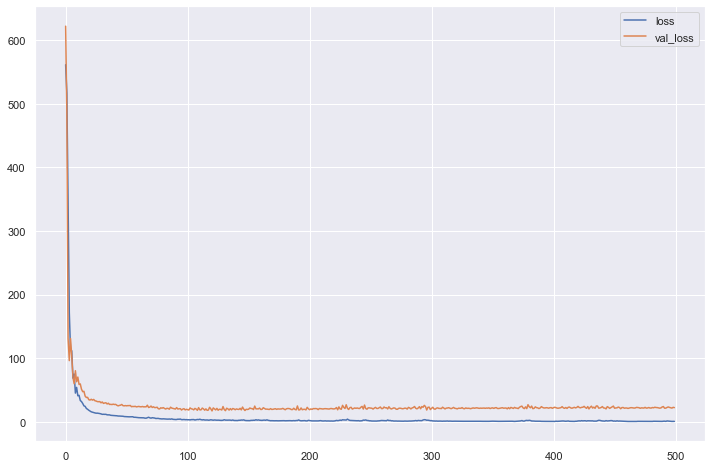

In [31]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8)) # Show results in a graph